# Caso 1 - Santiago Hoyos, Mariana Ramírez

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn import neighbors
import warnings
warnings.filterwarnings("ignore")

# Punto 1
Cargar el dataset HousingData, el cual se proveerá junto con un diccionario de los atributos. La variable objetivo es MEDV.

In [ ]:
#Cargar el dataset HousingData y el diccionario de atributos
data = pd.read_csv('HousingData1')

# Punto 2
Examinar y realizar una breve descripción de los tipos de variable o cualquier observación que considere pertinente. Remueva filas con valores ausentes si en algún punto lo considera necesario.

In [ ]:
# Muestra las primeras filas del DataFrame para examinar los datos
print(data.head())

# Descripción de los tipos de variables y estadísticas básicas
print(data.info())
print(data.describe())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3   

   TAX  PTRATIO  LSTAT  MEDV  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7    NaN  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        486 non-null    float64
 2   ZN          486 non-null    float64
 3   INDUS       486 non-null    fl

In [ ]:
# Manejar valores ausentes si es necesario
# Contar la cantidad de valores ausentes por columna
missing_values = data.isnull().sum()
print(missing_values)

# Si hay valores ausentes, puedes optar por eliminar las filas con valores ausentes
data_cleaned = data.dropna()

# Muestra la cantidad de filas antes y después del proceso de limpieza
print("Filas antes de la limpieza:", data.shape[0])
print("Filas después de la limpieza:", data_cleaned.shape[0])


Unnamed: 0     0
CRIM          20
ZN            20
INDUS         20
CHAS          20
NOX            0
RM             0
AGE           20
DIS            0
RAD            0
TAX            0
PTRATIO        0
LSTAT         20
MEDV           0
dtype: int64
Filas antes de la limpieza: 506
Filas después de la limpieza: 394


* Se observa que algunas columnas tienen valores ausentes. Las columnas con valores ausentes son: "CRIM", "ZN", "INDUS", "CHAS", "AGE" y "LSTAT".
* Se ha realizado una limpieza de datos eliminando las filas con valores ausentes, lo que resultó en un conjunto de datos con 394 filas.

# Punto 3
Separe el conjunto de datos en atributos X y variable objetivo y. Luego separe estos en conjuntos de entrenamiento y testeo, con una proporción de 75-25.

In [ ]:
# Separar atributos (X) y variable objetivo (y)
X = data_cleaned.drop(columns=['MEDV', 'Unnamed: 0'])  # Excluir la columna 'MEDV' para obtener los atributos
y = data_cleaned['MEDV']  # Variable objetivo 'MEDV'

# Dividir en conjuntos de entrenamiento y prueba (75-25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Punto 4
Entrene un modelo de regresión lineal usando el conjunto de entrenamiento. Determine su coeficiente de determinación (R2 o, en el caso de SKLearn el score). Extraiga los coeficientes o parámetros predichos por el modelo usando el atributo coef

In [ ]:
# Crear y entrenar el modelo de regresión lineal
regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
print("score = ", regr.score(X_test, y_test))
print("R^2 = ", mean_squared_error(y_test, pred))

score =  0.6796310160586931
R^2 =  30.102015516827503


In [ ]:
print(pd.Series(regr.coef_, index = X.columns))

CRIM       -0.126402
ZN          0.048651
INDUS       0.008644
CHAS        1.627774
NOX       -18.148097
RM          3.835818
AGE        -0.021863
DIS        -1.510003
RAD         0.243394
TAX        -0.014314
PTRATIO    -0.896333
LSTAT      -0.395926
dtype: float64


# Punto 5
Los datos con mayor valor teniendo en cuenta el valor absoluto son los que más afectan a la variable objetivo. La variable NOX (Concentración de óxidos de nitrógeno)que tiene un coeficiente de $|-18.148097|$ afecta de forma inversa a la variable; así como DIS (media ponderada de las distancias a cinco centros de empleo de Boston) con un coeficiente de $|-1.510003|$. Por otro lado, la variable RM (Cantidad promedio de habitaciones por vivienda), con coeficiente $|3.835818|$ es la de mayor impacto directo en MEDV; la segunda variable de este tipo que más afecta sería CHAS (¿Limita con el río Charles? 1 = sí, 0 = no) con un coeficiente $|1.627774|$

# Punto 6.

Cree una lista de valores para el parámetro alpha en los algoritmos de regularización. Usando la validación cruzada de Ridge, busque un valor óptimo para el parámetro α.

In [ ]:
# Definir la lista de valores de alpha
lambdas = 10**np.linspace(10,-2,100)

# Realizar validación cruzada para encontrar el valor óptimo de alpha
ridgecv = RidgeCV(alphas = lambdas, store_cv_values=True)
ridgecv.fit(X_train, y_train)
#ridgecv.alpha_  # = 0.053366992312063016

#Encontrar el valor óptimo de alpha, encajando en un intervalo más
lambdas = 10**np.linspace(0,-2,100)
ridgecv = RidgeCV(alphas = lambdas, store_cv_values=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_




0.058570208180566644

# Punto 7
Realice una regresión de Ridge usando el parámetro α hallado en el punto anterior.

In [ ]:
# Crear y entrenar el modelo de regresión Ridge con el valor óptimo de alpha
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

# Predecir valores en el conjunto de prueba
ridge_pred = ridge_model.predict(X_test)

# Calcular el coeficiente de determinación R^2 y el error cuadrado medio
ridge_score = ridge_model.score(X_test, y_test)
ridge_r2 = mean_squared_error(y_test, ridge_pred)

print("R^2 =", ridge_r2)
print("score =", ridge_score)

R^2 = 30.151949638871525
score = 0.6790995784234192


# Punto 8

In [ ]:
# Definir la lista de valores de alpha para Lasso
lambdas = 10**np.linspace(0, -3, 100)
# Realizar validación cruzada para encontrar el valor óptimo de alpha para Lasso
lassocv = LassoCV(alphas=lambdas, cv=5)
lassocv.fit(X_train, y_train)

# Obtener el valor óptimo de alpha para Lasso
lasso_optimal_alpha = lassocv.alpha_

print("Optimal alpha for Lasso:", lasso_optimal_alpha)

# Crear y entrenar el modelo de regresión Lasso con el valor óptimo de alpha
lasso_model = Lasso(alpha=lasso_optimal_alpha)
lasso_model.fit(X_train, y_train)

# Predecir valores en el conjunto de prueba usando el modelo Lasso
lasso_pred = lasso_model.predict(X_test)

# Calcular el coeficiente de determinación R^2 y el error cuadrado medio para Lasso
lasso_r2 = mean_squared_error(y_test, lasso_pred)
lasso_mse = lasso_model.score(X_test, y_test)
print("R^2 =", lasso_r2)
print("Mean Squared Error =", lasso_mse)


Optimal alpha for Lasso: 0.01519911082952933
R^2 = 30.572726665097154
Mean Squared Error = 0.6746213431277662


9. ¿Aplicar regresión de Ridge y Lasso mejoró el score de esta regresion?

Realmente no se evidencia mucha mejora respecto a los dos modelos utilizado

# Punto 10

Para determinar el maxdepth y max leaf nodes utilizamos la función GridSearch y los datos de entrenamiento.

In [ ]:
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("rf",DecisionTreeRegressor())])

param_grid = {
    'rf__max_depth': [1,2,3,4,5,6,7,8,9,10],
    'rf__max_leaf_nodes': [7,8,9,10,11,12,13]
}
# initialize
grid_pipeline = GridSearchCV(pipeline,param_grid)
# fit
grid_pipeline.fit(X_train,y_train)
grid_pipeline.best_params_

{'rf__max_depth': 3, 'rf__max_leaf_nodes': 7}

In [ ]:
tree = DecisionTreeRegressor(max_leaf_nodes=11,max_depth=7)
tree.fit(X_train,y_train)
print("score = ", tree.score(X_test, y_test))

score =  0.7079889427060138


# Punto 11
Grafique el árbol con el cual obtuvo un mayor score. Describa el modelo que define este árbol. ¿Qué atributos son los más importantes para este modelo? Compare esta lista de atributos con los obtenidos en el ıtem quinto.¿Se utilizan todos los atributos en este modelo? Si no, ¿cuáles no utiliza?

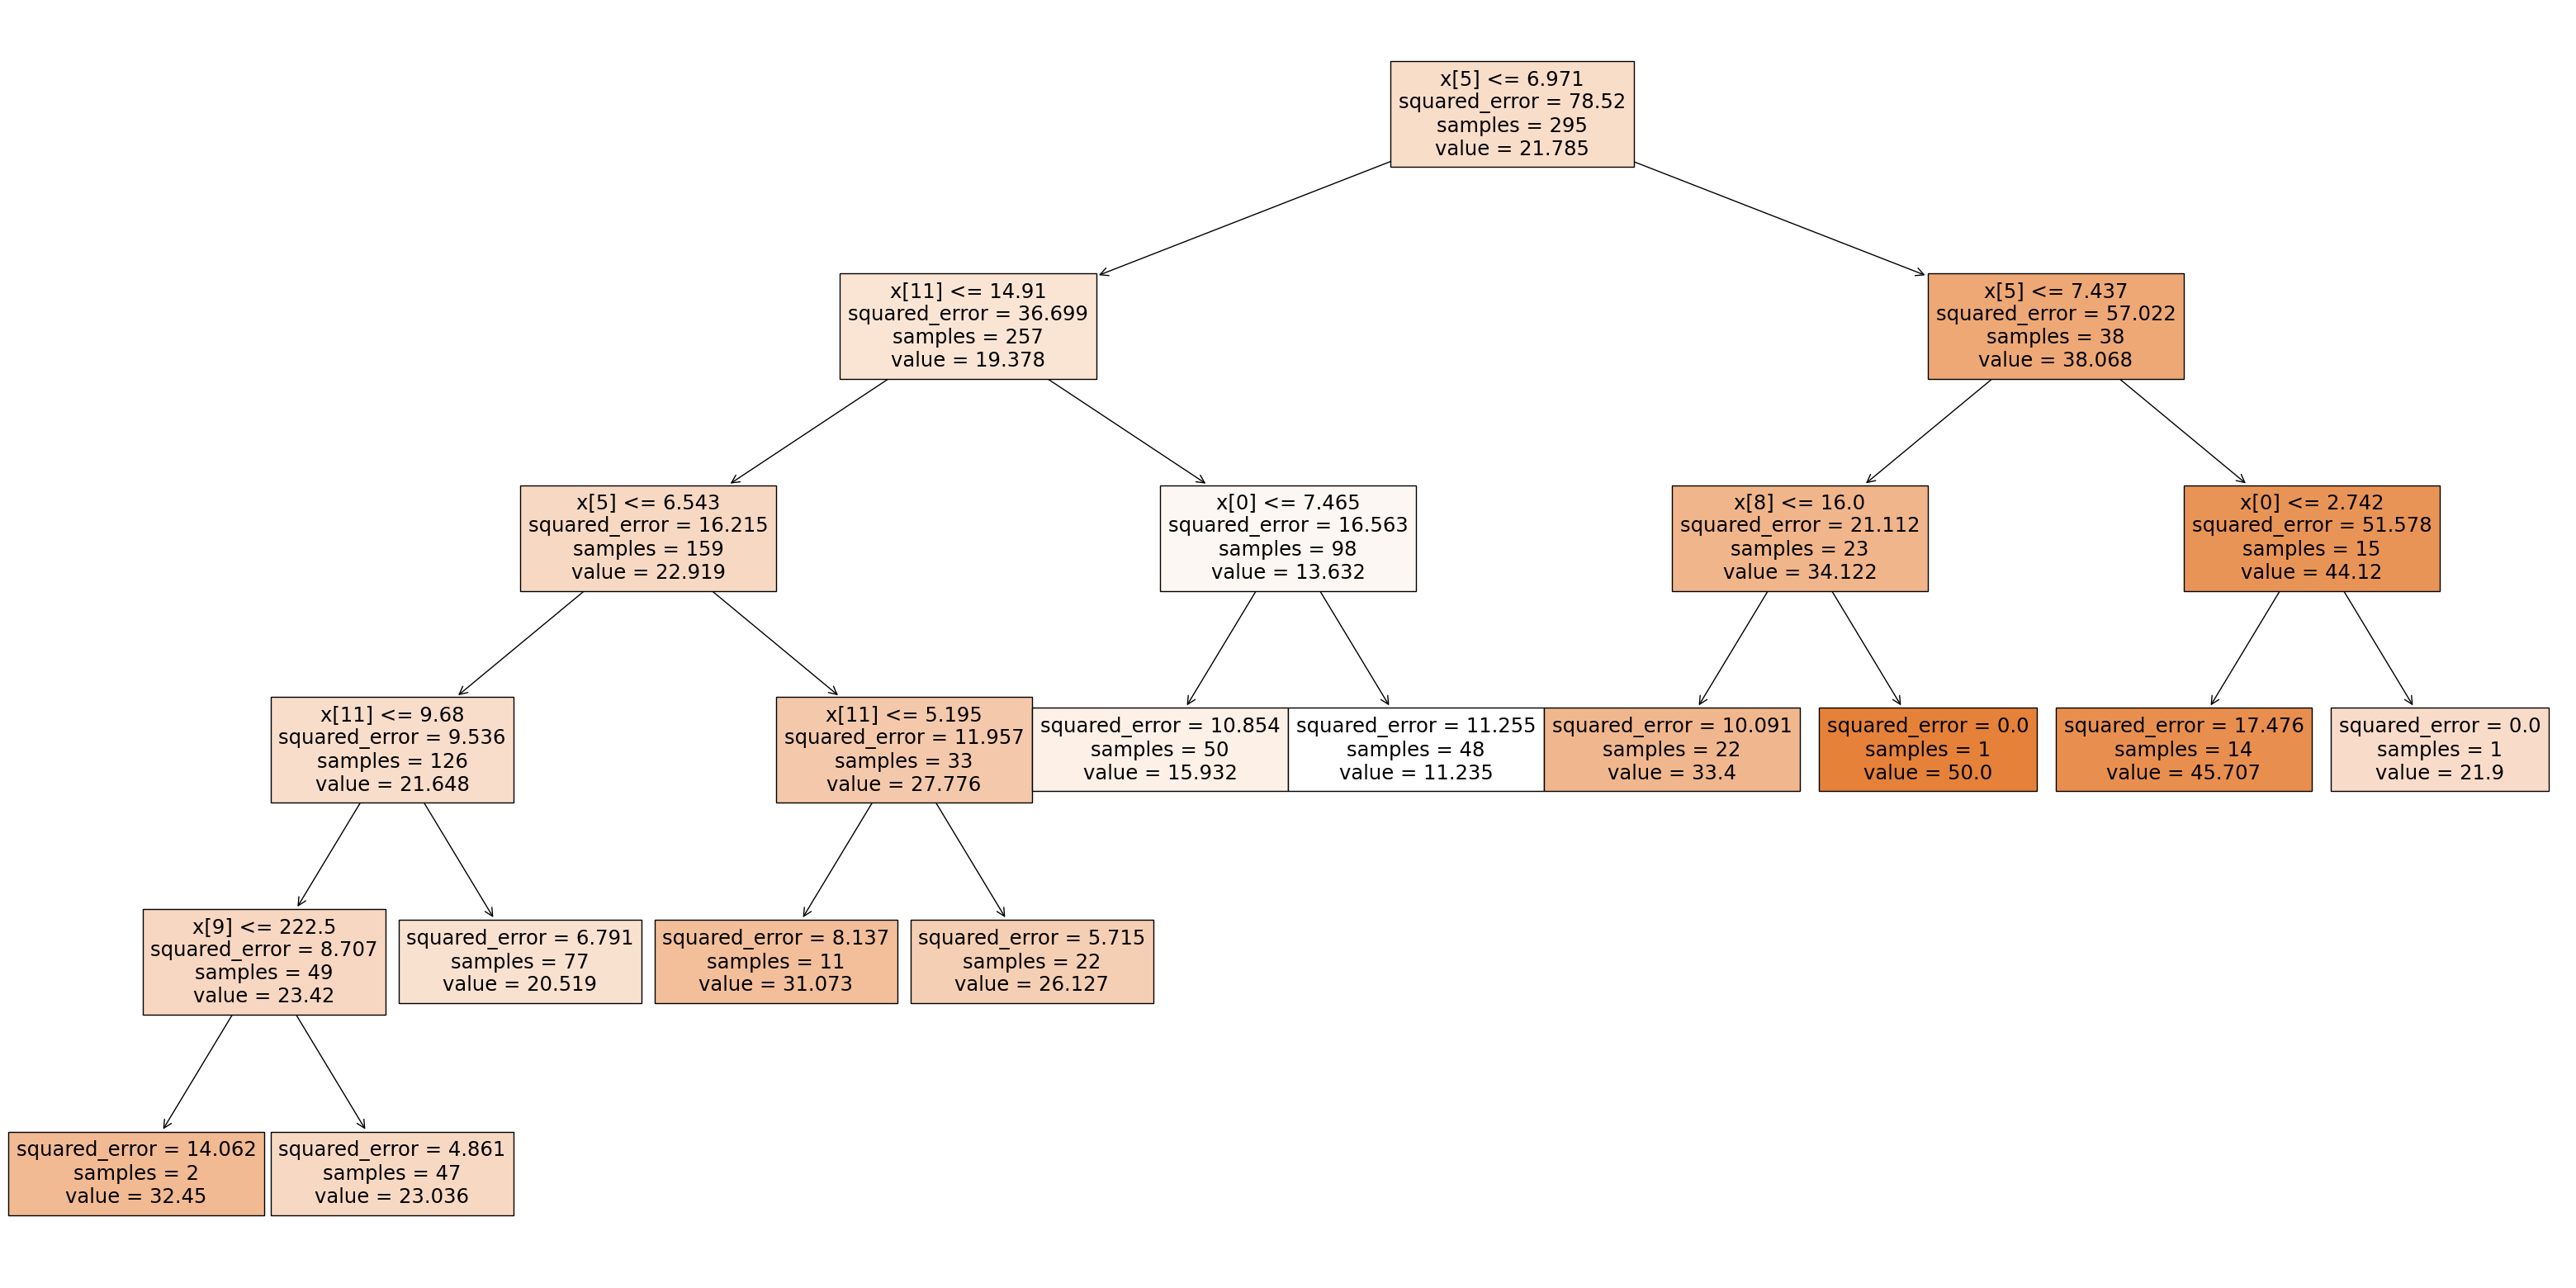

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(tree, filled=True, class_names=True)
plt.show()

Podemos ver que los atributos más importantes son  X[5]  RM (Cantidad promedio de habitaciones por vivienda) y  X[0]  CRIM (Taza de crímen por capita) ya que estos son los que más definen la ruta de decisión. El atribúto RM coinciden con los de las regresiones porque esta tambien era la variable que mayor peso tenían. Por otro lado, el modelo no utiliza todas las variables, esto tiene que ver con los max leaf nodes y max depth pero nos explica que todos los atributtos no tienen un peso alto para definir MEDV.

# Punto 12

Ahora aplicaremos el método de vecinos más cercanos para regresión. Utilice el KNeighbors regressor de SKLearn para predecir nuestra variable objetivo usando diferentes valores del pará el parámetro k. Quédese con el mejor parámetro y mencione su score.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

scores = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(model.score(X_test, y_test))
    print('Score for k = ' , K , 'is:', score)

Score for k =  1 is: 0.5305934125206773
Score for k =  2 is: 0.5507391646808152
Score for k =  3 is: 0.5792989802373189
Score for k =  4 is: 0.556001089801285
Score for k =  5 is: 0.6030753556914068
Score for k =  6 is: 0.5722000043174855
Score for k =  7 is: 0.5612876939399842
Score for k =  8 is: 0.5641921801145116
Score for k =  9 is: 0.5635707263285232
Score for k =  10 is: 0.556964747406148


In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Score:', score)

Score: 0.5507391646808152


# Punto 12

Se van a revisar 2 neighbours para determinar la clasificación de un query. Es importante apuntar que ningun score de k nos da mayor a 0.65

El modelo con mejor desempeño fue el arbol de decisión. El de peor desempeño fue el regresión de Lasso, aunque es mínimo el cambio respecto a Ridge. Sin embargo ningún modelo tuvo un score por debajo de 50%. La razón por la cual, el árbol de desición pudo haber sido el mejor modelo se debe a que en este se eliminaron muchas variables y solo se utilizaron 5. Esto nos muestra que para determinar el MEDV probablemente no son necesarias todas las varibles.

In [ ]:
%%shell
jupyter nbconvert --to html /content/Caso1_Machine_Learning.ipynb

[NbConvertApp] Converting notebook /content/Caso1_Machine_Learning.ipynb to html
[NbConvertApp] Writing 1119966 bytes to /content/Caso1_Machine_Learning.html
